## Dimensionality Reduction of Face Images (A Step-by-Step Guide)

## Sections in this Notebook

1.  **Data Loading and Inspection**: Loading the facial data from a CSV and visualizing the original face images.
2.  **PCA Implementation (From Scratch)**: Manual implementation of PCA using NumPy to calculate the mean face, covariance matrix, eigenvalues, and eigenvectors (Eigenfaces).
3.  **Dimensionality Reduction**: Projecting the original face vectors onto the subspace defined by the top Eigenfaces.
4.  **Face Reconstruction**: Using the compressed representation (projection) to reconstruct the original faces and analyzing the loss of information.
## Required Libraries

This notebook requires the following standard Python libraries:
* `numpy`
* `pandas`
* `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Loading and Inspection

In [2]:
data = pd.read_csv("./faces.csv", header=None).to_numpy()
data.shape

(400, 5600)

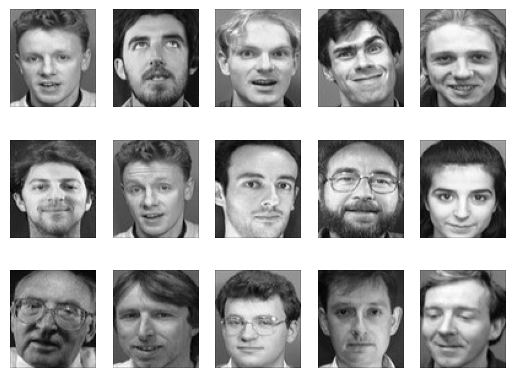

In [3]:
for i in range(3):
    for j in range(5):
        plt.subplot(3,5, 5*i + j + 1 )
        random_face = data[np.random.randint(400)].reshape(80,70)
        plt.imshow(random_face, cmap="gray")
        plt.axis("off")

plt.show()

### PCA Implementation

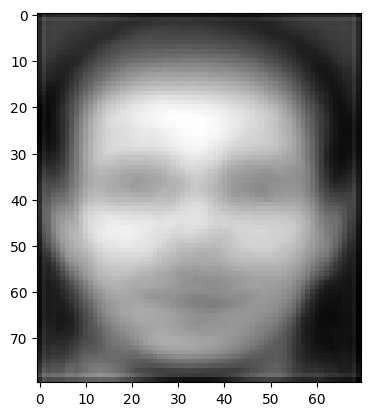

In [4]:
average_face = np.mean(data, axis=0) 
plt.imshow(average_face.reshape(80,70), cmap = plt.cm.binary_r);

The output image looks like an illusion of a face. An image that represents our average perception of a face !

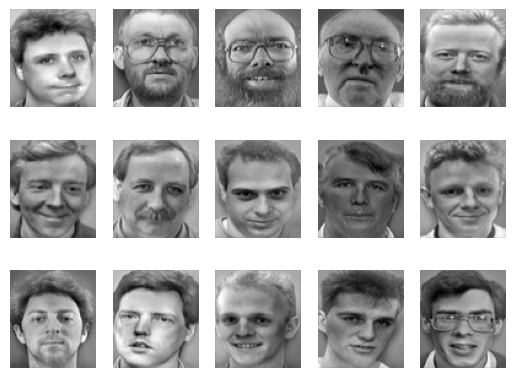

In [5]:
data_c = data - average_face    # Centered Data

for i in range(3):
    for j in range(5):
        plt.subplot(3,5, 5*i + j + 1 )
        random_face = data_c[np.random.randint(400)].reshape(80,70)
        plt.imshow(random_face, cmap="gray")
        plt.axis("off")

In [6]:
n = data.shape[0]
C_x = data_c.T @ data_c / n 
C_x.shape

(5600, 5600)

In [ ]:
# eigen_values, V = np.linalg.eig(C_x)   # Very long computation time

Very high computational cost !

A better way:

$$
A = U\Sigma V^T
$$

$$
\text{np.linalg.eig}(A^TA) \rightarrow V
$$

$$
\text{np.linalg.eig}(AA^T) \rightarrow U
$$

$$
\rightarrow V = A^TU\Sigma^{-1}
$$

In [8]:
n = data.shape[0]
C_x_small = data_c @ data_c.T / n 
C_x_small.shape

(400, 400)

In [18]:
eigen_values, U = np.linalg.eig(C_x_small)  # eigen_values are sorted in descending order by default
U.shape

(400, 400)

In [ ]:
eigen_values[eigen_values <= 0] = 1e-10     # Fix negative eigenvalues that are produced by numercial solver
Sigma = np.sqrt(eigen_values)
norm = Sigma * np.sqrt(n)

V = np.divide(data_c.T @ U, norm).T
V.shape


(400, 5600)

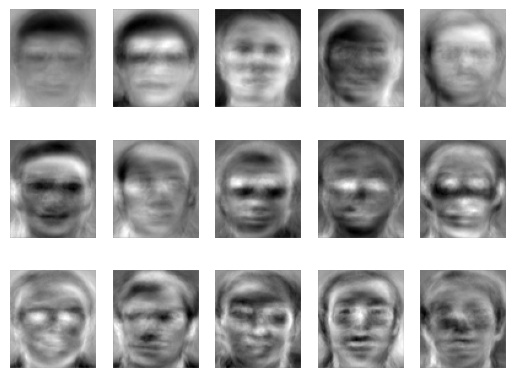

In [42]:
for i in range(3):
    for j in range(5):
        plt.subplot(3,5, 5*i + j + 1 )
        e_face = V[5*i + j].reshape(80,70)
        plt.imshow(e_face, cmap="gray")
        plt.axis("off")

plt.show()

Eigenvectors of face space — each one represents the orientation in which faces show more variance, each on is a principal component

### Dimensionality Reduction

In [88]:
n_components = 300

In [89]:
face_reduced = data_c @ V[:n_components].T
face_reduced.shape

(400, 300)

The dimension of each face image from 5600, reduced to n_components !

### Face Reconstruction

In [90]:
reconstructed = face_reduced @ V[:n_components] + average_face 
reconstructed.shape

(400, 5600)

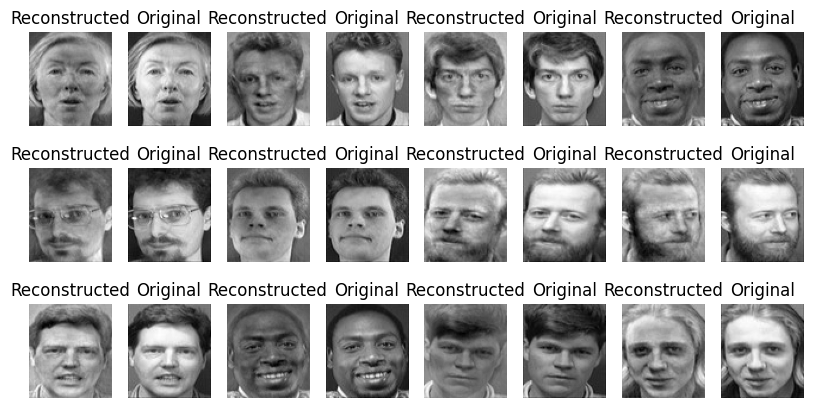

In [ ]:
plt.figure(figsize=(10,5))
for i in range(3):
    for j in range(4):
        idx = np.random.randint(len(data))
        
        plt.subplot(3,8, 8*i + 2*j + 1 )
        r_face = reconstructed[idx].reshape(80,70)
        plt.imshow(r_face, cmap="gray")
        plt.title("Reconstructed")        
        plt.axis("off")
        
        plt.subplot(3,8, 8*i + 2*j + 2 )
        org_face = data[idx].reshape(80,70)
        plt.imshow(org_face, cmap="gray")
        plt.title("Original")        
        plt.axis("off")

plt.show()